In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('Social_Network_Ads.csv')

df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [32]:
df = df.iloc[:,2:]

In [33]:
df.sample(5)

,Age,EstimatedSalary,Purchased
323,48,30000,1
271,59,76000,1
268,47,144000,1
109,38,80000,0
145,24,89000,0


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train , y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

In [36]:
X_train.shape, X_test.shape
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit the scaler to the train set , it will learn the parameters
scaler.fit(X_train)

#transfrom train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [39]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [40]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [41]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [42]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [43]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


**EFFECT OF SCALING**


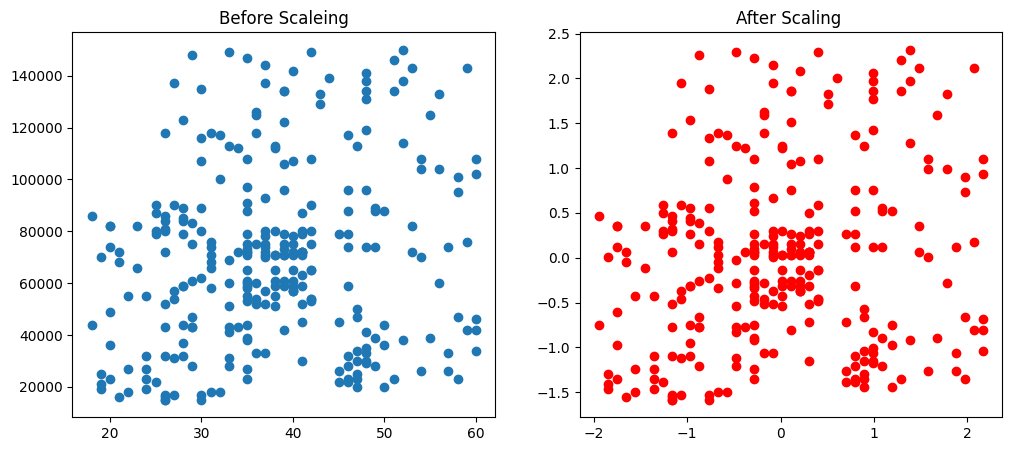

In [44]:
fig , (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaleing")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')

ax2.set_title("After Scaling ")
plt.show()



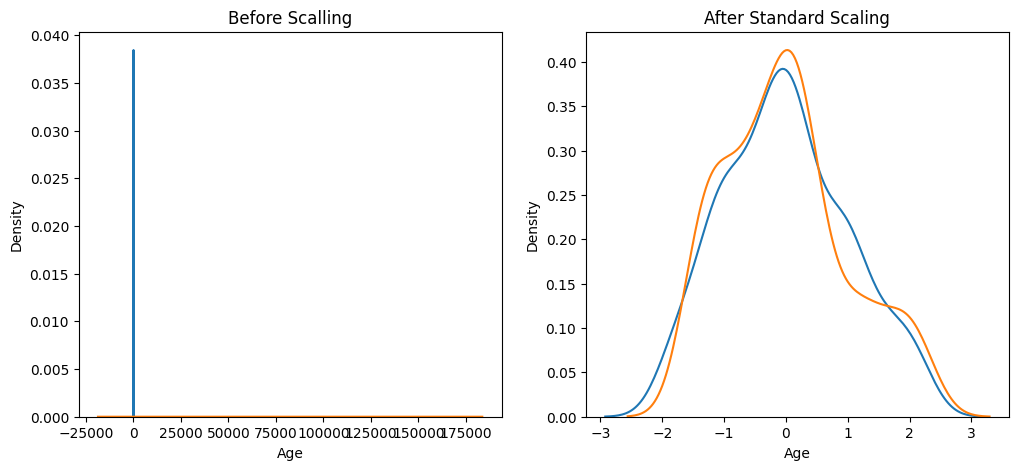

In [45]:
fig , (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))
#before scaling

ax1.set_title('Before Scalling')
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax =ax1)

#after scaling

ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

# not scaled the data correctly

**Comparision of Distribution**


<Axes: title={'center': 'Age distribution after scaling'}, xlabel='Age', ylabel='Density'>

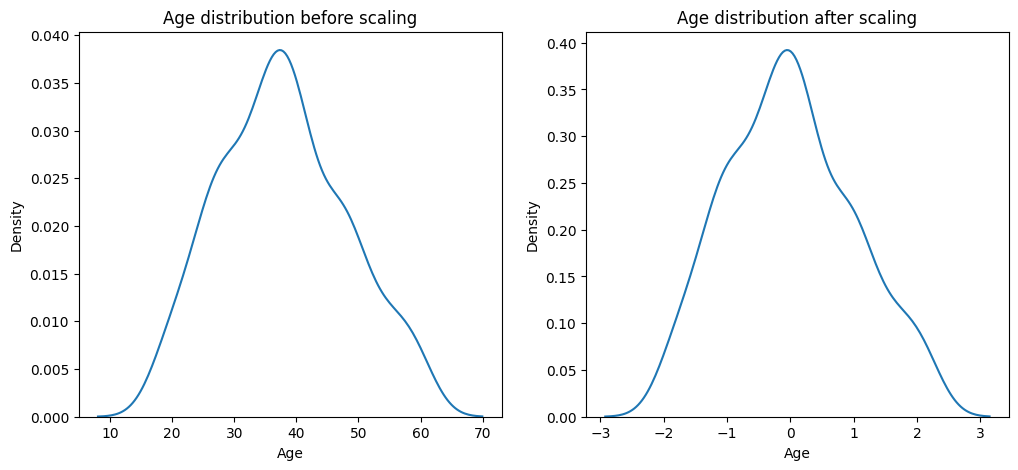

In [17]:
fig , (ax1, ax2) = plt.subplots(ncols=2, figsize  = (12,5))

#before scaling
ax1.set_title("Age distribution before scaling")
sns.kdeplot(X_train['Age'], ax = ax1)

#after scaling
ax2.set_title('Age distribution after scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)

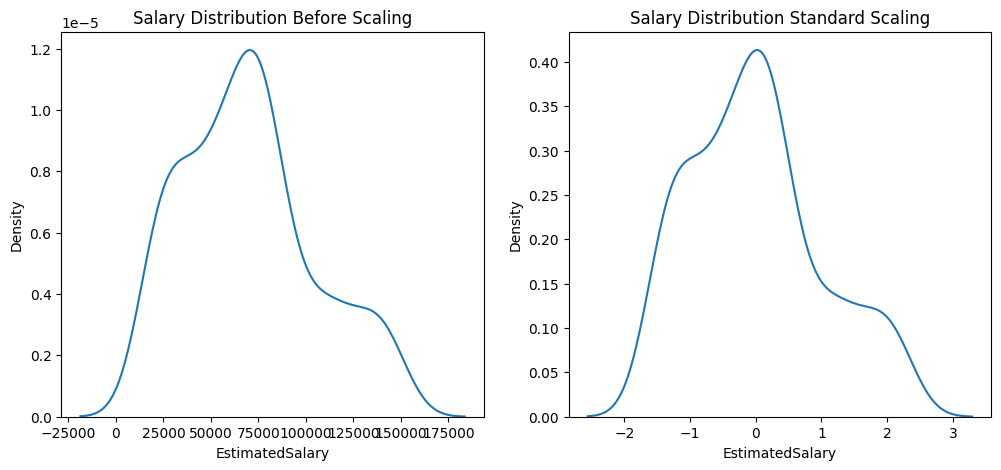

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [19]:
#Why Scaling is important


In [20]:
from sklearn.linear_model import LogisticRegression


In [21]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()


In [22]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print("Actual"  , accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))


Actual 0.875
Scaled 0.8666666666666667


In [26]:
#**EFFECT OF OUTLIER**


In [29]:
df = pd.concat(df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


TypeError: concat() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given